In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
custom_palette = ["gray", "green", "antiquewhite"]
sns.set_palette(custom_palette)
sns.set_style("darkgrid")

In [3]:
df_gray = pd.read_csv('dataset/gray_surface.csv', sep = ';').drop(columns = ['Unnamed: 43'])
df_green = pd.read_csv('dataset/green_surface.csv', sep = ';').drop(columns = ['Unnamed: 43'])
df_table = pd.read_csv('dataset/table_surface.csv', sep = ';').drop(columns = ['Unnamed: 43'])

In [4]:
df_gray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21560 entries, 0 to 21559
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Movement direction             21560 non-null  object
 1   Set robot speed along X axis   21560 non-null  object
 2   Set robot speed along Y axis   21560 non-null  object
 3   Set rotational robot velocity  21560 non-null  object
 4   1st motor set speed            21560 non-null  object
 5   2st motor set speed            21560 non-null  object
 6   3st motor set speed            21560 non-null  object
 7   1st motor position             21560 non-null  object
 8   2nd motor position             21560 non-null  object
 9   3rd motor position             21560 non-null  object
 10  1st motor velocity             21560 non-null  object
 11  2nd motor velocity             21560 non-null  object
 12  3rd motor velocity             21560 non-null  object
 13  1

In [5]:
def count_nan(df):
    for column in df.columns:
        numbers_nan_column = df[column].isna().sum()
        if numbers_nan_column > 0:
            print(f'Number of NaN in column {column}: {numbers_nan_column}')
            print(f'Ratio  of Nan in columns {column}: {round(numbers_nan_column/df.shape[0]*100, 2)}%')

In [6]:
count_nan(df_gray)

Number of NaN in column Motor 1 torque: 1921
Ratio  of Nan in columns Motor 1 torque: 8.91%
Number of NaN in column Motor 2 torque: 2214
Ratio  of Nan in columns Motor 2 torque: 10.27%
Number of NaN in column Motor 3 torque: 1802
Ratio  of Nan in columns Motor 3 torque: 8.36%


In [7]:
count_nan(df_green)

Number of NaN in column Motor 1 torque: 2332
Ratio  of Nan in columns Motor 1 torque: 9.17%
Number of NaN in column Motor 2 torque: 2036
Ratio  of Nan in columns Motor 2 torque: 8.0%
Number of NaN in column Motor 3 torque: 2394
Ratio  of Nan in columns Motor 3 torque: 9.41%


In [8]:
count_nan(df_table)

Number of NaN in column Motor 1 torque: 439
Ratio  of Nan in columns Motor 1 torque: 5.77%
Number of NaN in column Motor 2 torque: 617
Ratio  of Nan in columns Motor 2 torque: 8.11%
Number of NaN in column Motor 3 torque: 805
Ratio  of Nan in columns Motor 3 torque: 10.58%


In [9]:
def fill_nan(df):
    # Get only float value
    df = df.iloc[2:].astype("float")
    for column in df.columns:
        df[column].fillna(df[column].mean(), inplace = True)
    return df

In [10]:
df_gray = fill_nan(df_gray)
df_green = fill_nan(df_green)
df_table = fill_nan(df_table)

df_gray['color'] = "gray"
df_green['color'] = "green"
df_table['color'] = "table"

In [11]:
df = pd.concat([df_gray, df_green, df_table], ignore_index = True)
df.head()

,Movement direction,Set robot speed along X axis,Set robot speed along Y axis,Set rotational robot velocity,1st motor set speed,2st motor set speed,3st motor set speed,1st motor position,2nd motor position,3rd motor position,...,Wheel 2 effective velocity,Wheel 2 slippage,Motor 2 voltage,Motor 2 torque,Wheel 3 velocity,Wheel 3 effective velocity,Wheel 3 slippage,Motor 3 voltage,Motor 3 torque,color
0,0.0,0.1,0.0,0.0,-34.641,0.0,34.641,-1035.0,18.0,1039.0,...,0.0,0.0,0.000000,0.001593,1.590431,0.009376,0.994105,7.568766,0.350820,gray
1,0.0,0.1,0.0,0.0,-34.641,0.0,34.641,-1185.0,19.0,1178.0,...,0.0,0.0,-0.415301,-0.007532,1.590431,0.683054,0.570523,8.526490,0.455350,gray
2,0.0,0.1,0.0,0.0,-34.641,0.0,34.641,-1470.0,22.0,1458.0,...,0.0,0.0,0.000000,0.001593,1.590431,0.670479,0.578429,10.031590,0.646921,gray
3,0.0,0.1,0.0,0.0,-34.641,0.0,34.641,-1745.0,24.0,1733.0,...,0.0,0.0,0.000000,0.001593,1.413719,0.020060,0.985811,10.847660,0.873064,gray
4,0.0,0.1,0.0,0.0,-34.641,0.0,34.641,-1894.0,24.0,1866.0,...,0.0,0.0,0.000000,0.001593,1.413719,0.687064,0.514003,8.248019,0.486188,gray


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54597 entries, 0 to 54596
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Movement direction             54597 non-null  float64
 1   Set robot speed along X axis   54597 non-null  float64
 2   Set robot speed along Y axis   54597 non-null  float64
 3   Set rotational robot velocity  54597 non-null  float64
 4   1st motor set speed            54597 non-null  float64
 5   2st motor set speed            54597 non-null  float64
 6   3st motor set speed            54597 non-null  float64
 7   1st motor position             54597 non-null  float64
 8   2nd motor position             54597 non-null  float64
 9   3rd motor position             54597 non-null  float64
 10  1st motor velocity             54597 non-null  float64
 11  2nd motor velocity             54597 non-null  float64
 12  3rd motor velocity             54597 non-null 

<Axes: xlabel='color', ylabel='count'>

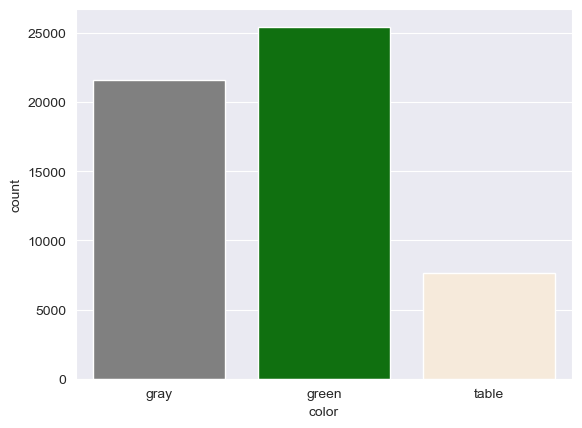

In [13]:
sns.countplot(x = "color", data = df, hue = "color")

In [14]:
from sklearn.preprocessing import OneHotEncoder

output_encoder = OneHotEncoder()
color_labels = output_encoder.fit_transform(df[["color"]])
color_labels.shape

(54597, 3)

In [15]:
df[["Gray", "Green", "Table"]] = color_labels.toarray()

In [16]:
df = df.drop(columns = ["color"])

In [17]:
correlation_matrix = df.corr()
correlation_matrix[["Gray", "Green", "Table"]].sort_values(by = "Gray", ascending = False)

,Gray,Green,Table
Gray,1.000000,-0.754394,-0.324934
Rotational current,0.373808,0.229360,-0.858199
X axis global position,0.299283,-0.331955,0.055727
3rd motor current,0.267279,0.043566,-0.440119
1st motor current,0.264308,0.037493,-0.427174
2nd motor current,0.046549,0.285879,-0.477598
Motor 3 voltage,0.018177,-0.023409,0.008064
3st motor set speed,0.015774,-0.026944,0.016549
Motor 3 torque,0.015525,-0.017925,0.003907
X axis current,0.015416,-0.015307,0.000289


In [18]:
df = df[["Gray", "Green", "Table",'Wheel 1 slippage', 'Wheel 2 slippage', 'Wheel 3 slippage', 'X axis global position', 'Y axis global position',
         '1st motor current', '2nd motor current', '3rd motor current', 'Rotational current']]

corr_matrix = df.corr()

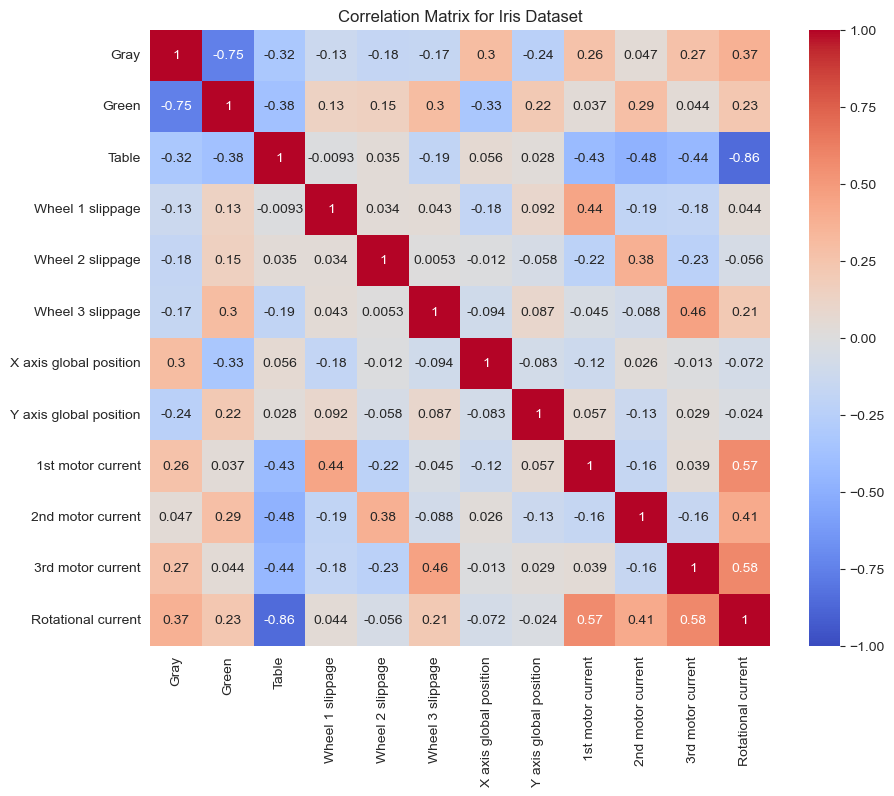

In [19]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix for Iris Dataset')
plt.show()

## Train the models

In [20]:
X = df.drop(columns = ["Gray", "Green", "Table"])
y = df[["Gray", "Green", "Table"]]

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

### 1. Decision Tree

### 2. Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.multiclass import OneVsRestClassifier

forest_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('random_forest', OneVsRestClassifier(RandomForestClassifier(random_state = 42)))
])

forest_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('random_forest',
                 OneVsRestClassifier(estimator=RandomForestClassifier(random_state=42)))])

In [23]:
cross_val_score(forest_clf, X_train, y_train, cv = 3, scoring = 'accuracy')

array([0.95079065, 0.95268331, 0.94798217])

In [24]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train, cv = 3,
                                   method = "predict_proba")

In [25]:
y_probas_forest

[array([[0.96, 0.04],
        [0.06, 0.94],
        [0.23, 0.77],
        ...,
        [0.84, 0.16],
        [0.33, 0.67],
        [0.3 , 0.7 ]]),
 array([[0.04, 0.96],
        [0.94, 0.06],
        [0.77, 0.23],
        ...,
        [0.16, 0.84],
        [0.67, 0.33],
        [0.7 , 0.3 ]]),
 array([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]])]

In [26]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_probas_forest[:, 1])

TypeError: list indices must be integers or slices, not tuple

In [ ]:
from sklearn.metrics import recall_score, precision_score

recall_score(y_probas_forest, y_train, average= "weighted")